![enter image description here](https://img.shields.io/badge/Author-Nestor_Batista_Díaz-yellow)

# <center>CLIPS</center>

##  FACIL

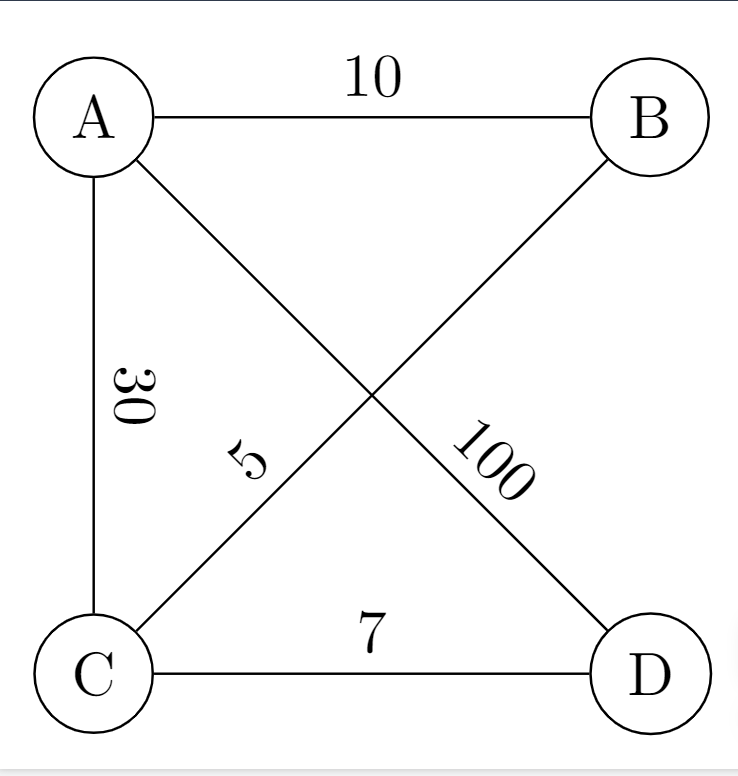

## INTERMEDIO

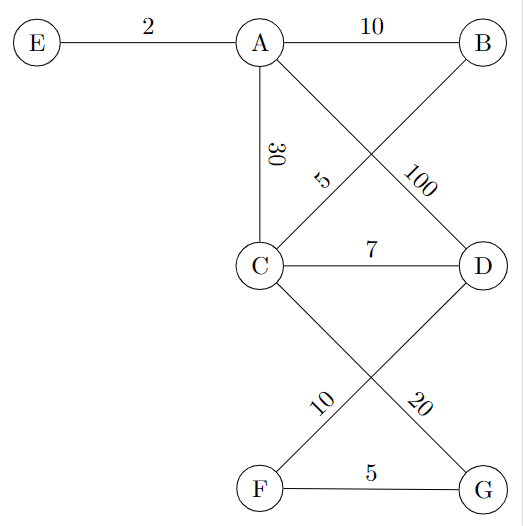

Importamos las librerias, logging es para que aparezcan los prints (aunque al final no se uso por complicaciones con el clipspy)

In [12]:
import clips
import logging

Definimos el formato en el que apareceran los prints

In [13]:
log_format = '%(message)s'
logging.basicConfig(level=logging.DEBUG, format=log_format)

Iniciamos el entorno de clips y añadimos el router para leer los prints

In [14]:
env = clips.Environment()

router = clips.LoggingRouter()
env.add_router(router)

Definimos la plantilla "camino"

In [15]:
template_string = """
(deftemplate camino
  (slot origen)
  (slot destino)
  (slot coste)
  (slot atajo))
"""

env.build(template_string)

Definimos todos los caminos con sus costes

In [16]:
# Intente hacerlo con esta sintaxis, pero da muchos fallos

# template.assert_fact(origen='A', destino='B', coste=10, atajo="")
# template.assert_fact(origen='A', destino='D', coste=100, atajo="")
# template.assert_fact(origen='A', destino='C', coste=30, atajo="")
# template.assert_fact(origen='B', destino='C', coste=5, atajo="")
# template.assert_fact(origen='C', destino='D', coste=7, atajo="")
# template.assert_fact(origen='B', destino='D', coste=10000, atajo="")

# GRAFO FACIL
# deffact_string = """
# (deffacts DISTANCIAS
#    (camino (origen A) (destino B) (coste 10) (atajo ""))
#    (camino (origen A) (destino C) (coste 30) (atajo ""))
#    (camino (origen A) (destino D) (coste 100) (atajo "") )
#    (camino (origen B) (destino C) (coste 5) (atajo ""))
#    (camino (origen B) (destino D) (coste 1e10) (atajo ""))
#    (camino (origen C) (destino D) (coste 7) (atajo ""))
#    (camino (origen B) (destino A) (coste 10) (atajo ""))
#    (camino (origen C) (destino A) (coste 30) (atajo ""))
#    (camino (origen D) (destino A) (coste 100) (atajo ""))
#    (camino (origen C) (destino B) (coste 5) (atajo ""))
#    (camino (origen D) (destino B) (coste 1e10) (atajo ""))
#    (camino (origen D) (destino C) (coste 7) (atajo ""))
#    )
# """

# GRAFO INTERMEDIO
deffact_string = """
(deffacts DISTANCIAS
   (camino (origen A) (destino B) (coste 10) (atajo ""))
   (camino (origen A) (destino C) (coste 30) (atajo ""))
   (camino (origen A) (destino D) (coste 100) (atajo "") )
   (camino (origen B) (destino C) (coste 5) (atajo ""))
   (camino (origen B) (destino D) (coste 1e10) (atajo ""))
   (camino (origen C) (destino D) (coste 7) (atajo ""))
   (camino (origen A) (destino F) (coste 1e10) (atajo ""))
   (camino (origen A) (destino G) (coste 1e10) (atajo ""))
   (camino (origen A) (destino E) (coste 2) (atajo ""))
   (camino (origen B) (destino E) (coste 1e10) (atajo ""))
   (camino (origen B) (destino F) (coste 1e10) (atajo ""))
   (camino (origen B) (destino G) (coste 1e10) (atajo ""))
   (camino (origen C) (destino E) (coste 1e10) (atajo ""))
   (camino (origen C) (destino G) (coste 20) (atajo ""))
   (camino (origen C) (destino F) (coste 1e10) (atajo ""))
   (camino (origen D) (destino E) (coste 1e10) (atajo ""))
   (camino (origen D) (destino G) (coste 1e10) (atajo ""))
   (camino (origen D) (destino F) (coste 10) (atajo ""))
   (camino (origen F) (destino E) (coste 1e10) (atajo ""))
   (camino (origen G) (destino E) (coste 1e10) (atajo ""))
   (camino (origen F) (destino G) (coste 5) (atajo ""))
   (camino (origen B) (destino A) (coste 10) (atajo ""))
   (camino (origen C) (destino A) (coste 30) (atajo ""))
   (camino (origen D) (destino A) (coste 100) (atajo "") )
   (camino (origen C) (destino B) (coste 5) (atajo ""))
   (camino (origen D) (destino B) (coste 1e10) (atajo ""))
   (camino (origen D) (destino C) (coste 7) (atajo ""))
   (camino (origen F) (destino A) (coste 1e10) (atajo ""))
   (camino (origen G) (destino A) (coste 1e10) (atajo ""))
   (camino (origen E) (destino A) (coste 2) (atajo ""))
   (camino (origen E) (destino B) (coste 1e10) (atajo ""))
   (camino (origen F) (destino B) (coste 1e10) (atajo ""))
   (camino (origen G) (destino B) (coste 1e10) (atajo ""))
   (camino (origen E) (destino C) (coste 1e10) (atajo ""))
   (camino (origen G) (destino C) (coste 20) (atajo ""))
   (camino (origen F) (destino C) (coste 1e10) (atajo ""))
   (camino (origen E) (destino D) (coste 1e10) (atajo ""))
   (camino (origen G) (destino D) (coste 1e10) (atajo ""))
   (camino (origen F) (destino D) (coste 10) (atajo ""))
   (camino (origen E) (destino F) (coste 1e10) (atajo ""))
   (camino (origen E) (destino G) (coste 1e10) (atajo ""))
   (camino (origen G) (destino F) (coste 5) (atajo ""))
   )
"""

env.build(deffact_string)

for fact in env.facts():
    print(fact)


Definir regla para actualizar el coste de cada camino y atajos

In [9]:
rule = """(defrule ACTUALIZA
  ?H <- (camino (origen ?X) (destino ?Y) (coste ?Z))
  (camino (origen ?C) (destino ?Y) (coste ?D) (atajo ?A))
  (camino (origen ?X) (destino ?C) (coste ?F))
  (test (> ?Z (+ ?D ?F)))
=>
  (modify ?H (coste (+ ?D ?F)) (atajo (str-cat - ?C - ?A))))"""

env.build(rule)

for rule in env.rules():
    print(rule)

(defrule MAIN::ACTUALIZA ?H <- (camino (origen ?X) (destino ?Y) (coste ?Z)) (camino (origen ?C) (destino ?Y) (coste ?D) (atajo ?A)) (camino (origen ?X) (destino ?C) (coste ?F)) (test (> ?Z (+ ?D ?F))) => (modify ?H (coste (+ ?D ?F)) (atajo (str-cat - ?C - ?A))) (printout t "HOLAAA"))


In [17]:
# Recupera la plantilla de camino
template = env.find_template('camino')


# # Pregunta por origen y destino del camino que se quiere consultar
origen  = input("Nodo Origen: ")
destino = input("Nodo Destino: ")

# Definir la regla para encontrar el camino correspondiente
env.define_function(lambda origen, destino: env.find_fact('DISTANCIAS', (
    ('origen', origen),
    ('destino', destino)
)), 'find_camino')



# Ejecuta las activaciones en la agenda
env.reset()
env.run()

# Buscar hechos en el entorno
facts = env.facts()

# Encuentra la ruta más corta
ruta_mas_corta = None
for fact in facts:
    if (fact['origen'] == origen and fact['destino'] == destino):
        ruta_mas_corta = fact
        break

if ruta_mas_corta:
    print(f"La ruta de {origen} a {destino} más corta es:")
    print(f"Coste: {ruta_mas_corta['coste']}, Atajo: {origen}-{ruta_mas_corta['atajo']}-{destino}")
else:
    print(f"No se encontró una ruta de {origen} a {destino}.")

0